<a href="https://colab.research.google.com/github/harrythu25/MNSIT_with_user_input/blob/master/MNIST_With_Convoluted_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds


# Load Dataset


In [55]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True, try_gcs=True)
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

In [57]:
test = [(example.numpy(), label.numpy()) for example, label in mnist_train]

In [48]:
import pandas as pd

test=pd.DataFrame(test, columns=['example', 'label'])

test['example'][0].shape

(28, 28, 1)

# Data Pre Processing 


## Scale and Split Data

In [58]:
#preparing the data sets before splitting
#take input and transform
def scale (image, label):
  image = tf.cast (image, tf.float32) #make sure it's float
  image /= 255. #values are between 0 and 255 based on the shades; divide everything by 255 so each input is between 0 and 1  
  return image, label


#scale the data
scaled_train_and_validation= mnist_train.map(scale) #use .map function to transform train data
test_data = mnist_test.map(scale) #use .map function to transform test data


#shuffle data so batches wont affect model
shuffled_train_and_validation = scaled_train_and_validation.shuffle(10000)

#Calculating sample sizes
num_validation = 0.1 * mnist_info.splits['train'].num_examples #0.1 because only want 10%
num_validation = tf.cast(num_validation_samples, tf.int64) #cast to integer

num_test = mnist_info.splits['test'].num_examples
num_test = tf.cast(num_test_samples, tf.int64) #cast to integer

validation_data = shuffled_train_and_validation_data.take(num_validation)
train_data = shuffled_train_and_validation_data.skip(num_validation)




## Setting Batch Sizes

Because I am going to use the mini batch gradient descent for my optimizing function, I need to set the batch size



In [59]:
#setting batch size to prepare data for model
BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE) #override .batch method with my size
validation_data = validation_data.batch(num_validation_samples)  #to take in the whole data set, 
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))



# Basic Artifical Neural Network

## Creating Basic Artifical Neural Network

In [97]:
#hyper parameters
input_size = 784 # 28px x 28px
output_size = 10 #0-9
hidden_layer_size = 100 #originally 50, changed it to 100 for experimentation 

model_ANN = tf.keras.Sequential([                           
                             tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
                             tf.keras.layers.Dense(hidden_layer_size, activation= 'relu'), # first hidden layer
                             tf.keras.layers.Dense(hidden_layer_size, activation= 'relu'),  # second hidden layer
                             tf.keras.layers.Dense(output_size, activation='softmax') #output layer softmax to transform into probability since this is a classifier model
                            ])

## Choosing Optimizer and Loss Function

In [98]:
model_ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

## Training

### 5 Epochs

In [95]:
NUM_EPOCHS =5

training_results_10_epochs= model_ANN.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose =2 )

Epoch 1/5
540/540 - 3s - loss: 0.3334 - accuracy: 0.9054 - val_loss: 0.1701 - val_accuracy: 0.9492
Epoch 2/5
540/540 - 3s - loss: 0.1347 - accuracy: 0.9594 - val_loss: 0.1175 - val_accuracy: 0.9643
Epoch 3/5
540/540 - 3s - loss: 0.0959 - accuracy: 0.9706 - val_loss: 0.1072 - val_accuracy: 0.9655
Epoch 4/5
540/540 - 3s - loss: 0.0732 - accuracy: 0.9782 - val_loss: 0.0769 - val_accuracy: 0.9772
Epoch 5/5
540/540 - 3s - loss: 0.0585 - accuracy: 0.9825 - val_loss: 0.0723 - val_accuracy: 0.9785


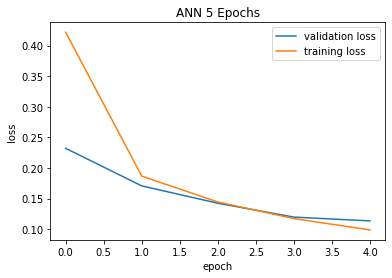

In [96]:
plt.title("ANN 5 Epochs")
plt.plot(training_results_5_epochs.history['val_loss'])
plt.plot(training_results_5_epochs.history['loss'])
plt.legend(['validation loss','training loss'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


### 10 Epochs

In [100]:
NUM_EPOCHS =10

training_results_10_epochs= model_ANN.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose =2 )

Epoch 1/10
540/540 - 4s - loss: 0.3277 - accuracy: 0.9065 - val_loss: 0.1766 - val_accuracy: 0.9477
Epoch 2/10
540/540 - 3s - loss: 0.1372 - accuracy: 0.9598 - val_loss: 0.1186 - val_accuracy: 0.9647
Epoch 3/10
540/540 - 3s - loss: 0.0960 - accuracy: 0.9711 - val_loss: 0.0968 - val_accuracy: 0.9707
Epoch 4/10
540/540 - 3s - loss: 0.0742 - accuracy: 0.9774 - val_loss: 0.0826 - val_accuracy: 0.9750
Epoch 5/10
540/540 - 3s - loss: 0.0609 - accuracy: 0.9812 - val_loss: 0.0724 - val_accuracy: 0.9787
Epoch 6/10
540/540 - 3s - loss: 0.0507 - accuracy: 0.9845 - val_loss: 0.0688 - val_accuracy: 0.9787
Epoch 7/10
540/540 - 3s - loss: 0.0423 - accuracy: 0.9868 - val_loss: 0.0544 - val_accuracy: 0.9818
Epoch 8/10
540/540 - 3s - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0434 - val_accuracy: 0.9857
Epoch 9/10
540/540 - 3s - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0367 - val_accuracy: 0.9868
Epoch 10/10
540/540 - 3s - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0375 - val_accuracy: 0.9872

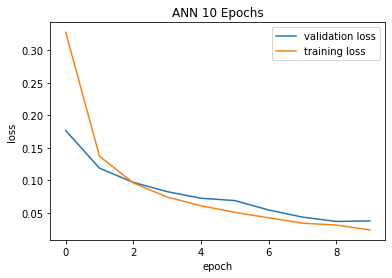

In [102]:
plt.title("ANN 10 Epochs")
plt.plot(training_results_10_epochs.history['val_loss'])
plt.plot(training_results_10_epochs.history['loss'])
plt.legend(['validation loss','training loss'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


## Testing

In [90]:
ANN_loss, ANN_accuracy = model_ANN.evaluate(test_data)

1/1 [==============================] - 0s 330ms/step - loss: 0.0750 - accuracy: 0.9783


# Convolutional Neural Network

## Creating Convolutional Neural Network

In [125]:
#hyper parameters
input_size = 784 # 28px x 28px
output_size = 10 #0-9
hidden_layer_size = 100

model_CNN = tf.keras.Sequential([
                            tf.keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)),
                            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),   
                              tf.keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)),
                            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),                          
                             tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
                             tf.keras.layers.Dense(hidden_layer_size, activation= 'relu'), # first hidden layer
                             tf.keras.layers.Dense(hidden_layer_size, activation= 'relu'),  # second hidden layer
                             tf.keras.layers.Dense(output_size, activation='softmax') #output layer softmax to transform into probability since this is a classifier model
                            ])

## Choosing Optimizer and Loss Function

In [126]:
model_CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

## Training

### 5 Epochs

In [122]:
NUM_EPOCHS =5

training_results_5_epochs= model_CNN.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose =2 )

Epoch 1/5
540/540 - 28s - loss: 0.2647 - accuracy: 0.9202 - val_loss: 0.0974 - val_accuracy: 0.9710
Epoch 2/5
540/540 - 28s - loss: 0.0738 - accuracy: 0.9775 - val_loss: 0.0706 - val_accuracy: 0.9783
Epoch 3/5
540/540 - 27s - loss: 0.0486 - accuracy: 0.9845 - val_loss: 0.0470 - val_accuracy: 0.9858
Epoch 4/5
540/540 - 26s - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0443 - val_accuracy: 0.9870
Epoch 5/5
540/540 - 29s - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0381 - val_accuracy: 0.9875


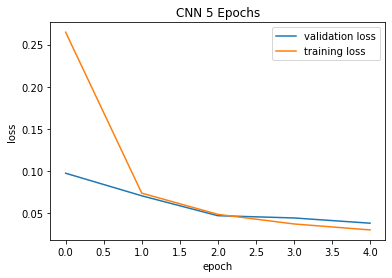

In [123]:
plt.title("CNN 5 Epochs")
plt.plot(training_results_5_epochs.history['val_loss'])
plt.plot(training_results_5_epochs.history['loss'])
plt.legend(['validation loss','training loss'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### 10 Epochs


In [127]:
NUM_EPOCHS =10

training_results_5_epochs= model_CNN.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose =2 )

Epoch 1/10
540/540 - 30s - loss: 0.2464 - accuracy: 0.9283 - val_loss: 0.1026 - val_accuracy: 0.9678
Epoch 2/10
540/540 - 30s - loss: 0.0677 - accuracy: 0.9793 - val_loss: 0.0580 - val_accuracy: 0.9822
Epoch 3/10
540/540 - 30s - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0492 - val_accuracy: 0.9850
Epoch 4/10
540/540 - 31s - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0404 - val_accuracy: 0.9872
Epoch 5/10
540/540 - 32s - loss: 0.0271 - accuracy: 0.9910 - val_loss: 0.0454 - val_accuracy: 0.9855
Epoch 6/10
540/540 - 30s - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0330 - val_accuracy: 0.9893
Epoch 7/10
540/540 - 31s - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0288 - val_accuracy: 0.9915
Epoch 8/10
540/540 - 31s - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0289 - val_accuracy: 0.9922
Epoch 9/10
540/540 - 31s - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0283 - val_accuracy: 0.9938
Epoch 10/10
540/540 - 30s - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0221 - val_accura

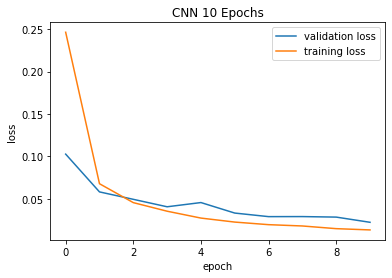

In [128]:
plt.title("CNN 10 Epochs")
plt.plot(training_results_5_epochs.history['val_loss'])
plt.plot(training_results_5_epochs.history['loss'])
plt.legend(['validation loss','training loss'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## Testing

In [124]:
CNN_loss, CNN_accuracy = model_CNN.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.0339 - accuracy: 0.9894


In [129]:
CNN_loss, CNN_accuracy = model_CNN.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.0435 - accuracy: 0.9889


Model that was trained on 10 epochs is slightly overfitting because the one trained on 5 epoch performed better with the test data. 

## Final Model

In [139]:
#hyper parameters
input_size = 784 # 28px x 28px
output_size = 10 #0-9
hidden_layer_size = 100

model_CNN = tf.keras.Sequential([
                            tf.keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)),
                            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),   
                              tf.keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)),
                            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),       
                            tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(hidden_layer_size, activation= 'relu'), # first hidden layer
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(hidden_layer_size, activation= 'relu'),  # second hidden layer
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(output_size, activation='softmax') #output layer softmax to transform into probability since this is a classifier model
                            ])
model_CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

NUM_EPOCHS =10

training_results_10_epochs_3dropout= model_CNN.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose =2 )

Epoch 1/10
540/540 - 50s - loss: 0.3546 - accuracy: 0.8887 - val_loss: 0.0902 - val_accuracy: 0.9715
Epoch 2/10
540/540 - 49s - loss: 0.1150 - accuracy: 0.9654 - val_loss: 0.0658 - val_accuracy: 0.9792
Epoch 3/10
540/540 - 47s - loss: 0.0819 - accuracy: 0.9752 - val_loss: 0.0440 - val_accuracy: 0.9868
Epoch 4/10
540/540 - 45s - loss: 0.0673 - accuracy: 0.9794 - val_loss: 0.0429 - val_accuracy: 0.9865
Epoch 5/10
540/540 - 46s - loss: 0.0586 - accuracy: 0.9826 - val_loss: 0.0340 - val_accuracy: 0.9902
Epoch 6/10
540/540 - 45s - loss: 0.0531 - accuracy: 0.9841 - val_loss: 0.0321 - val_accuracy: 0.9903
Epoch 7/10
540/540 - 47s - loss: 0.0474 - accuracy: 0.9854 - val_loss: 0.0267 - val_accuracy: 0.9915
Epoch 8/10
540/540 - 46s - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0287 - val_accuracy: 0.9910
Epoch 9/10
540/540 - 47s - loss: 0.0412 - accuracy: 0.9874 - val_loss: 0.0248 - val_accuracy: 0.9925
Epoch 10/10
540/540 - 45s - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0230 - val_accura

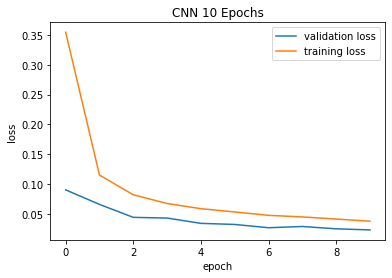

In [140]:
plt.title("CNN 10 Epochs")
plt.plot(training_results_10_epochs_3dropout.history['val_loss'])
plt.plot(training_results_10_epochs_3dropout.history['loss'])
plt.legend(['validation loss','training loss'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

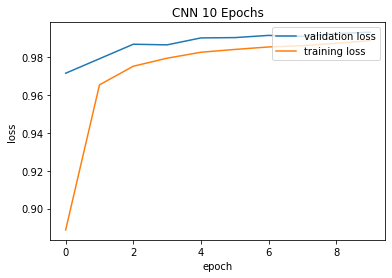

In [141]:
plt.title("CNN 10 Epochs")
plt.plot(training_results_10_epochs_3dropout.history['val_accuracy'])
plt.plot(training_results_10_epochs_3dropout.history['accuracy'])
plt.legend(['validation loss','training loss'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [142]:
CNN_loss, CNN_accuracy = model_CNN.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.0284 - accuracy: 0.9914
